# Data 불러오기 및 형태 분석

## 1. Wikipedia Document

In [3]:
# 라이브러리 불러오기 
import os
import json

In [5]:
wiki_path = 'data/wikipedia_documents.json'
wiki_doc = json.load(open(wiki_path, 'r'))

print(f'wiki_doc 길이 : {len(wiki_doc)}')

wiki_doc 길이 : 60613


In [6]:
wiki_doc['0']

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [9]:
import pandas as pd

wiki_df = pd.DataFrame(wiki_doc).transpose()

wiki_df

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [16]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           60613 non-null  object
 1   corpus_source  60613 non-null  object
 2   url            4554 non-null   object
 3   domain         0 non-null      object
 4   title          60613 non-null  object
 5   author         0 non-null      object
 6   html           0 non-null      object
 7   document_id    60613 non-null  object
dtypes: object(8)
memory usage: 4.2+ MB


In [126]:
import re

# 한글이 ratio 이상인지 판단하는 함수
def is_korean_dominant(text):
    korean_chars = re.findall(r'[가-힣]', text)
    total_chars = len(text)
    
    if total_chars == 0:
        return False  # 텍스트가 비어 있으면 False 반환
    
    korean_ratio = len(korean_chars) / total_chars
    return korean_ratio >= 0.1

# 한글이 ratio% 미만인 텍스트 필터링
filtered_df = wiki_df[~wiki_df['text'].apply(is_korean_dominant)]

# 결과 출력
print(filtered_df)


                                                    text corpus_source   url  \
344    파일:Selbstbildnis mit schwarzem Hund.jpg|\n파일:C...         위키피디아  TODO   
875    다음은 대화형으로 사용자의 숫자 입력을 받아서 평균을 출력하는 프로그램이다.\n\n...         위키피디아  TODO   
973    :참고 문헌 목록은 제1차 세계 대전의 서지 문서를 참조하십시오.\n \n* tit...         위키피디아  TODO   
1150   폴 매카트니의 음반 목록\n비틀즈#음반 목록|설명=비틀즈로서 발매한 음반에 대해서는...         위키피디아  TODO   
1163   쌍곡선 함수의 역함수는 다음과 같다.\n:\begin{align}\n  \opera...         위키피디아  TODO   
...                                                  ...           ...   ...   
60293  headline=사이드 1|title1=Don't Want You No More|w...         위키피디아  None   
60402  다음 의사코드는 HMAC가 어떻게 구현될 수 있는지를 증명한다. 다음 해시 함수 중...         위키피디아  None   
60403  다음은 8비트 ASCII 또는 UTF-8 인코딩 사용을 상정한, 일부 비어있지 않은...         위키피디아  None   
60404  ; 참고 자료\n \n* Mihir Bellare, Ran Canetti and H...         위키피디아  None   
60574  all_writing=표시한 곳을 제외하고는 폴 웨스터버그|title6=Swingi...         위키피디아  None   

      domain                          t

In [127]:
print(f'\n\n 한글 비율이 30% 미만인 문서 수 : {len(pd.unique(filtered_df.title))} / 총 문서 수 {len(wiki_df)}')
print(f'\n\n한글 비율이 30% 미만인 문서의 title : {pd.unique(filtered_df.title)}')



 한글 비율이 30% 미만인 문서 수 : 350 / 총 문서 수 60613


한글 비율이 30% 미만인 문서의 title : ['귀스타브 쿠르베' '포트란' '제1차 세계 대전' '폴 매카트니' '쌍곡선 함수' '타타르어' '니브흐어' '카탈랑 수'
 'MOS 6502' '뺄셈' '2016년 하계 올림픽' '하노이의 탑' '가이아나의 국가' '소인수분해'
 '교향곡 25번 (모차르트)' '이집트의 국가' '넬 (밴드)' '1904년 하계 올림픽' '몰도바의 국가' '마리차는 전진한다'
 'Nm (유닉스)' '스리랑카의 국가' '슬라브족이여' '미얀마의 국가' '아메리카 연합국의 국가' '스위스의 국가'
 '웨일스의 국가' '지브롤터의 국가' '아르차흐 공화국의 국가' '오스트리아의 국가' '근본주의' '자바빈즈' '블루북'
 '트란스니스트리아의 국가' 'FIFA 시리즈 사운드트랙' '조지프 후커' 'A. P. 힐' '존 뷰퍼드'
 '1982년 FIFA 월드컵' '코다 쿠미' '근구수왕' '침류왕' '근정전' '폴 사이먼' '여치과' 'PL/SQL' '탄약통'
 '멕시코의 국가' '페르시아의 국가' '발터 하르처' '미치프어' '스타 스키마' '셸 정렬' '절단 가능 소수'
 'ABC (프로그래밍 언어)' '티어스 포 피어스' '원더걸스' 'VM웨어' '저장 프로시저' 'IBM 3270' '국제사법위원회'
 '셸 스크립트' 'K3리그 2007' 'WSDL' '탄소 연소 과정' '액티브엑스 데이터 오브젝트' '이존오' '레모 루피니'
 '중화 타이베이 올림픽 위원회' '2008년 동아시아 여자 축구 선수권 대회' '브라이언 이노' '윙 (가수)'
 '다오 (프로그래밍 언어)' '에어 매니지먼트2' 'K리그 1984' '합병 정렬' 'LGA 775' '마이클 커티즈'
 '팩토리 메서드 패턴' '이튼 그룹' 'The System Has Failed' '칸타브리아어' '댄 시먼스' '로버트 트루히요'
 '그리스 내전' "Live at Wembley '86" '대니

In [131]:
# 한글 비율을 계산하는 함수
def korean_ratio(text):
    korean_chars = re.findall(r'[가-힣]', text)
    total_chars = len(text)
    
    if total_chars == 0:
        return 0.0  # 텍스트가 비어 있으면 비율 0.0 반환
    
    return len(korean_chars) / total_chars  # 한글 비율 계산

# 비율 구간을 설정
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = [f'{int(b*100)}-{int((b+0.1)*100)}%' for b in bins[:-1]]

# 각 텍스트의 한글 비율을 계산
wiki_df['korean_ratio'] = wiki_df['text'].apply(korean_ratio)

# 비율 구간을 기준으로 그룹화
wiki_df['korean_range'] = pd.cut(wiki_df['korean_ratio'], bins=bins, labels=labels, right=False)

# 새로운 DataFrame 생성: 그룹별 데이터 수와 document_id 리스트를 도출
result_df = wiki_df.groupby('korean_range').agg(count=('document_id', 'size'), id_list=('document_id', list)).reset_index()

# 불필요한 열 제거 (원하는 경우)
result_df = result_df.drop(columns=['korean_range'])

# 결과 출력
print(result_df)


   count                                            id_list
0    479  [344, 875, 973, 1150, 1163, 1164, 1364, 1667, ...
1    270  [70, 270, 362, 1254, 1672, 1685, 2683, 2738, 3...
2    565  [32, 60, 90, 161, 480, 568, 630, 873, 1140, 11...
3   1223  [144, 165, 237, 275, 440, 481, 487, 517, 518, ...
4   2863  [30, 86, 120, 122, 152, 160, 163, 183, 192, 19...
5  10117  [7, 8, 31, 49, 50, 53, 57, 58, 73, 83, 84, 92,...
6  32262  [0, 1, 2, 3, 5, 9, 11, 12, 13, 14, 15, 17, 19,...
7  12831  [4, 6, 10, 16, 18, 20, 21, 22, 23, 27, 28, 34,...
8      2                                       [2737, 7291]
9      1                                            [40965]


/tmp/ipykernel_427794/1757971009.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df = wiki_df.groupby('korean_range').agg(count=('document_id', 'size'), id_list=('document_id', list)).reset_index()


In [157]:
print(wiki_df[wiki_df['document_id'] == 0]['text'].values[0])

이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.

이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.

# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.
# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.

두 목록은 모두 가나다 순이다.

일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.


## 2. Train Dataset

### 2-1. 데이터 형태 및 통계 분석

#### 2-1-1. 데이터 형태 분석

In [52]:
from datasets import load_from_disk

train_path = 'data/train_dataset'
test_path = 'data/test_dataset'

train = load_from_disk(train_path)
test = load_from_disk(test_path)
train

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})

In [53]:
test

DatasetDict({
    validation: Dataset({
        features: ['question', 'id'],
        num_rows: 600
    })
})

In [75]:
train['train'][0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [96]:
type(train['train'][0]['answers']['answer_start'])

list

In [86]:
train_df = pd.DataFrame(train['train'])
valid_df = pd.DataFrame(train['validation'])
test_df = pd.DataFrame(test)

print(f'train_df 길이 : {len(train_df)}')
print(f'valid_df 길이 : {len(valid_df)}')
print(f'test_df 길이 : {len(test_df)}')


train_df.head(3)

train_df 길이 : 3952
valid_df 길이 : 240
test_df 길이 : 600


,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230


In [58]:
test_df.head(3)

,validation
0,"{'question': '유령'은 어느 행성에서 지구로 왔는가?', 'id': 'm..."
1,{'question': '용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?'...
2,{'question': '돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받...


In [111]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  600 non-null    object
 1   id        600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [87]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              240 non-null    object
 1   context            240 non-null    object
 2   question           240 non-null    object
 3   id                 240 non-null    object
 4   answers            240 non-null    object
 5   document_id        240 non-null    int64 
 6   __index_level_0__  240 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.2+ KB


In [100]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   validation  600 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


In [98]:
# answers의 answer_start와 text가 모두 값이 있는지 확인하는 함수
def check_answers(row):
    answer_start = row['answers']['answer_start']
    text = row['answers']['text']
    
    # answer_start와 text가 모두 값이 있는지 확인
    return len(answer_start)!=0 and len(text)!=0

# 각 행에 대해 확인 결과를 새로운 컬럼에 저장
train_df['answers_complete'] = train_df.apply(check_answers, axis=1)
valid_df['answers_complete'] = valid_df.apply(check_answers, axis=1)

# answers_complete가 False인 행만 필터링
train_empty_answers_df = train_df[~train_df['answers_complete']]
valid_empty_answers_df = valid_df[~valid_df['answers_complete']]


# 결과 출력
print('answer가 비어 있는 셀들:')
print(train_empty_answers_df[['answers', 'answers_complete']])
print(valid_empty_answers_df[['answers', 'answers_complete']])

# 비어 있는 셀의 개수 출력
train_empty_count = train_empty_answers_df.shape[0]
valid_empty_count = valid_empty_answers_df.shape[0]

print(f"\ntrain 비어 있는 셀의 개수: {train_empty_count}")
print(f"\nvalid 비어 있는 셀의 개수: {valid_empty_count}")


answer가 비어 있는 셀들:
Empty DataFrame
Columns: [answers, answers_complete]
Index: []
Empty DataFrame
Columns: [answers, answers_complete]
Index: []

train 비어 있는 셀의 개수: 0

valid 비어 있는 셀의 개수: 0


In [95]:
train_df

,title,context,question,id,answers,document_id,__index_level_0__,answers_complete
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,True
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,True
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,True
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,True
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,True
...,...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445,True
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450,True
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252,True
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595,True


In [67]:
# filtered_df의 'title' 컬럼에서 고유한 값들을 추출
unique_titles = pd.unique(filtered_df['title'])

# 포함된 항목들을 리스트로 반환하는 함수
def find_included_titles(text, unique_titles):
    included_titles = [title for title in unique_titles if title in text]
    return included_titles if included_titles else None

# train_df의 'context' 컬럼에 대해 포함된 항목 확인
train_df['included_titles'] = train_df['context'].apply(lambda x: find_included_titles(x, unique_titles))
train_df['is_included'] = train_df['included_titles'].apply(lambda x: x is not None)

# valid_df의 'context' 컬럼에 대해 포함된 항목 확인
valid_df['included_titles'] = valid_df['context'].apply(lambda x: find_included_titles(x, unique_titles))
valid_df['is_included'] = valid_df['included_titles'].apply(lambda x: x is not None)

# test_df의 'validation' 컬럼에 대해 포함된 항목 확인
test_df['included_titles'] = test_df['validation'].apply(lambda x: find_included_titles(x, unique_titles))
test_df['is_included'] = test_df['included_titles'].apply(lambda x: x is not None)

# 결과 확인 (포함된 항목이 있는 데이터프레임만 출력)
print(train_df[train_df['is_included']])
print(valid_df[valid_df['is_included']])
print(test_df[test_df['is_included']])


               title                                            context  \
2                강희제  강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...   
4            계사명 사리구  동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...   
9                모후산  모후산(母后山)대한민국 전라남도 화순군과 순천시의 경계를 이루는 높이 943.7m의...   
10     황해 해전 (1894년)  이후, 여순항에 피항한 북양함대는 일본 육군에 의해 육지로부터 포위될 뻔 했다. 북...   
11    터미널 (2004년 영화)  동유럽의 소국 크라코지아에서 온 빅토르 나보르스키가 미국 뉴욕의 존 F. 케네디 국...   
...              ...                                                ...   
3944          전자감시제도  감시 시스템에 대해 성찰해야 한다.\n\n2003년 시민들은 프라이버시를 지키기 위...   
3945      미국 알래스카 육군  1940년, 제2차 세계 대전에 대비하기 위해 알래스카 방위군이 창설되었다. 랜드리...   
3946          막리지의 난  628년에 당이 마지막 남은 군벌 세력과 서돌궐을 제거하고 통일하였듯, 당의 성장을...   
3949     빈 필하모니 관현악단  1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...   
3950             드래곤  원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...   

                                  question            id  \
2           강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌

In [71]:
# 각 데이터프레임의 included_titles에서 모든 포함된 제목들을 수집
train_titles = train_df['included_titles'].dropna().explode().unique()
valid_titles = valid_df['included_titles'].dropna().explode().unique()
test_titles = test_df['included_titles'].dropna().explode().unique()

# 세 데이터프레임에서 포함된 모든 제목들의 집합
all_included_titles = set(train_titles).union(set(valid_titles), set(test_titles))

# unique_titles에서 한 번도 포함되지 않은 제목을 찾기 위한 차집합 계산
unused_titles = set(unique_titles) - all_included_titles

# 결과 출력
print(f'한 번도 등장하지 않은 제목 수 : {len(unused_titles)}')
print(f'한 번도 등장하지 않은 제목들: {unused_titles}')

한 번도 등장하지 않은 제목 수 : 3360
한 번도 등장하지 않은 제목들: {'소행성 분광형', '삼성 갤럭시 A40', '커버리티', '프로덕션 바오밥', '트라이 (컴퓨팅)', '게오르크 프리드리히 헨델', '엘비스 프레슬리가 선 레코드에서 녹음한 노래 목록', '애들레이드', '아이보리 조 헌터', '툰드라밭쥐', '조지 N. 질레트', 'ISO/IEC JTC 1', '마크 스피츠', '정관오 선', '김선묵', '2000 투데이', '코카콜라 제로', 'Rec. 2020', '한국형 대전차 로켓', 'ZX81', '용병 (소설)', '팜팡가어', '디비피디아', '알곤킨어파', '질베르 드 몽팡시에 백작', '에라스뮈스 프로그램', '이기 팝', '큰인도시벳', 'Too Bright', '임계 구역', '방사량', 'A Real Live One', 'The Boys of Wexford', 'DIVA Single Version', '타우린', '언노운디제이스', '고트하르트 바시스 터널', '남궁계', '안드리 솁첸코', '북항 국제 음악 페스티벌', "Sgt. Pepper's Lonely Hearts Club Band (노래)", 'Helter Skelter', '3+세대 원자로', '미쓰비시후소트럭 버스', '탄연', 'PERC%NT', '서머벨', '태국 육군사관학교', '그래프 그림', '투마스 하케', '미러리스 렌즈 교환식 카메라', 'KSR-III', '재령 이씨', '남원 양씨 (楊)', '택멸', '리틀 윌리 존', '참조 투명성', '지하수함양', '권근', '스크린도어', '남아메리카코아티', '삼손과 데릴라 (영화)', '미국 북부사령부', '뿌요뿌요!! 20th 애니버서리', '롤랜드 MT-32', '불교 용어 목록 (이)', 'Mean Woman Blues', '영구구속금지의 원칙', 'MOS 6502', '국가해방운동 (알바니아)', '행렬 이론', '나취시', '아름다운 버디베어', '점화식', '해주 김씨', '창원 신불사

#### 2-1-2. 결측값 조사


In [20]:
# context 길이 분포
train_context_len_list = [len(context) for context in train['train']['context']]

# answers 길이 분포
train_answers_len_list = [len(answer['text'][0]) for answer in train['train']['answers']]

# answers start 분포
train_answers_start_list = [answer['answer_start'][0] for answer in train['train']['answers']]


# context 결측값 조사
print(f'context 결측값 개수 : {train_context_len_list.count(0)}')

# answers 결측값 조사
print(f'answers 결측값 개수 : {train_answers_len_list.count(0)}')

# answers start 결측값 조사
print(f'answers start 결측값 개수 : {train_answers_start_list.count(0)}')


context 결측값 개수 : 0
answers 결측값 개수 : 0
answers start 결측값 개수 : 69


#### 2-1-3. 데이터셋 text의 한글 구성 비율 조사

In [153]:
test_df

,question,id,korean_ratio,korean_range
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653,0.714286,70-80%
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113,0.774194,70-80%
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191,0.743590,70-80%
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951,0.750000,70-80%
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272,0.807692,80-90%
...,...,...,...,...
595,타입 2 가이아 메모리을 만든 집단은?,mrc-0-002989,0.666667,60-70%
596,장면이 정치보복에 반대하는 입장에서 처벌을 원치 않은 대상은?,mrc-0-001804,0.764706,70-80%
597,"콜드게임 중 어떠한 계기로 인해 잠시 중단된 뒤, 익일에 게임이 진행되는 것은?",mrc-0-003411,0.704545,70-80%
598,제2캐나다기갑여단이 상륙한 곳은?,mrc-0-003436,0.777778,70-80%


In [168]:
# 한글 비율을 계산하는 함수
def korean_ratio(text):
    korean_chars = re.findall(r'[가-힣]', text)
    total_chars = len(text)
    
    if total_chars == 0:
        return 0.0  # 텍스트가 비어 있으면 비율 0.0 반환
    
    return len(korean_chars) / total_chars  # 한글 비율 계산

def column_korean_ratio(df, col):
    # 비율 구간을 설정
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    labels = [f'{int(b*100)}-{int((b+0.1)*100)}%' for b in bins[:-1]]

    # 각 텍스트의 한글 비율을 계산
    df['korean_ratio'] = df[col].apply(korean_ratio)

    # 비율 구간을 기준으로 그룹화
    df['korean_range'] = pd.cut(df['korean_ratio'], bins=bins, labels=labels, right=False)

    # 새로운 DataFrame 생성: 그룹별 데이터 수와 document_id 리스트를 도출
    result_df = df.groupby('korean_range').agg(count=('document_id', 'size'), id_list=('document_id', list)).reset_index()

    # 불필요한 열 제거 (원하는 경우)
    result_df = result_df.drop(columns=['korean_range'])

    # 결과 출력
    print(result_df)

print(column_korean_ratio(valid_df, 'context'))

   count                                            id_list
0      0                                                 []
1      0                                                 []
2      0                                                 []
3      0                                                 []
4      0                                                 []
5      0                                                 []
6    109  [51765, 59536, 13804, 19942, 56403, 16552, 293...
7    131  [9027, 15694, 32991, 27139, 19975, 58032, 9786...
8      0                                                 []
9      0                                                 []
None


/tmp/ipykernel_427794/3792780969.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df = df.groupby('korean_range').agg(count=('document_id', 'size'), id_list=('document_id', list)).reset_index()


In [170]:
print(valid_df[valid_df['document_id']==9027]['context'].values[0])

순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\n\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \n\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.


In [154]:
# 각 텍스트의 한글 비율을 계산
test_df['korean_ratio'] = test_df['question'].apply(korean_ratio)
# 비율 구간을 기준으로 그룹화
test_df['korean_range'] = pd.cut(test_df['korean_ratio'], bins=bins, labels=labels, right=False)

test_res_df = test_df.groupby('korean_range').agg(count=('id', 'size'), id_list=('id', list)).reset_index()
# 불필요한 열 제거 (원하는 경우)
test_res_df = test_res_df.drop(columns=['korean_range'])
# 결과 출력
print(test_res_df)

   count                                            id_list
0      0                                                 []
1      0                                                 []
2      0                                                 []
3      3         [mrc-0-002654, mrc-0-001757, mrc-0-002033]
4      1                                     [mrc-0-004280]
5      8  [mrc-0-003298, mrc-0-003870, mrc-0-003509, mrc...
6     58  [mrc-0-000439, mrc-0-002895, mrc-0-001326, mrc...
7    486  [mrc-1-000653, mrc-1-001113, mrc-0-002191, mrc...
8     44  [mrc-1-001272, mrc-0-004318, mrc-1-001353, mrc...
9      0                                                 []


/tmp/ipykernel_427794/2037170442.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_res_df = test_df.groupby('korean_range').agg(count=('id', 'size'), id_list=('id', list)).reset_index()


In [179]:
test_df[test_df['id']=='mrc-0-002033']

,question,id,korean_ratio,korean_range
381,"신문 <파시스트 정권,Il Regime Fascista>의 주된 논조는?",mrc-0-002033,0.35,30-40%


#### 2-1-4. 데이터 통계 분석

Text(0.5, 0, 'Start')

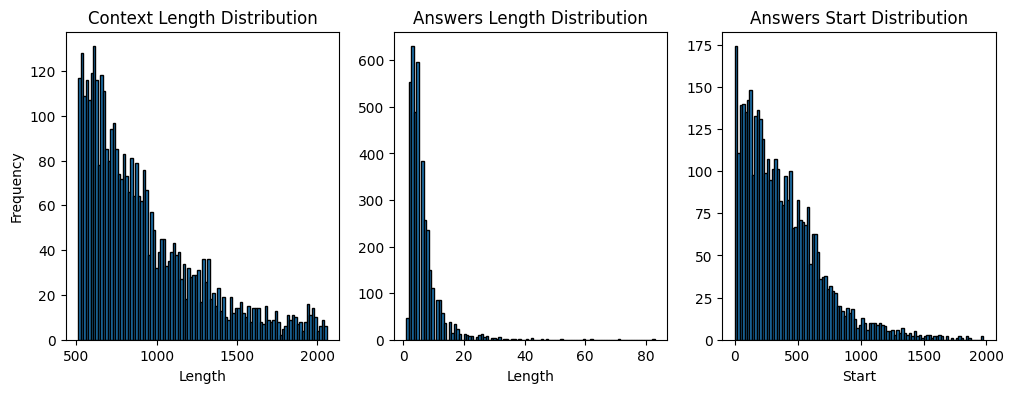

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(train_context_len_list, bins=100, edgecolor='black')
axes[0].set_title('Context Length Distribution')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(train_answers_len_list, bins=100, edgecolor='black')
axes[1].set_title('Answers Length Distribution')
axes[1].set_xlabel('Length')

axes[2].hist(train_answers_start_list, bins=100, edgecolor='black')
axes[2].set_title('Answers Start Distribution')
axes[2].set_xlabel('Start')


In [22]:
import statistics

print('============= Context Data =============\n')

print(f'Context 최대 길이 : {max(train_context_len_list)}')
print(f'Context 최소 길이 : {min(train_context_len_list)}')
print(f'Context 평균 길이 : {sum(train_context_len_list) / len(train_context_len_list)}')
print(f'Context 표준편차 : {statistics.stdev(train_context_len_list)}\n\n')

print('============= Answers Data =============\n')

print(f'Answers 최대 길이 : {max(train_answers_len_list)}')
print(f'Answers 최소 길이 : {min(train_answers_len_list)}')
print(f'Answers 평균 길이 : {sum(train_answers_len_list) / len(train_answers_len_list)}')
print(f'Answers 표준편차 : {statistics.stdev(train_answers_len_list)}')


============= Context Data =============

Context 최대 길이 : 2059
Context 최소 길이 : 512
Context 평균 길이 : 920.2206477732793
Context 표준편차 : 356.50051395517175


============= Answers Data =============

Answers 최대 길이 : 83
Answers 최소 길이 : 1
Answers 평균 길이 : 6.275050607287449
Answers 표준편차 : 5.346841757336768


In [23]:
answer_padding = 15

print('최장 답변\n')

longest_answer = train["train"][train_answers_len_list.index(max(train_answers_len_list))]
longest_answer_start = longest_answer['answers']['answer_start'][0]

print(f'길이 : {max(train_answers_len_list)}')
print(f'문제 : {longest_answer["question"]}')
print(f'답변 : {longest_answer["answers"]["text"][0]}')
print(f'문단(-pad ~ +pad) :\n{longest_answer["context"][longest_answer_start-answer_padding:longest_answer_start + len(longest_answer["answers"]["text"][0])+answer_padding]}')

print('\n==========================================\n')
print('최단 답변\n')

shortest_answer = train["train"][train_answers_len_list.index(min(train_answers_len_list))]
shortest_answer_start = shortest_answer['answers']['answer_start'][0]

print(f'길이 : {min(train_answers_len_list)}')
print(f'문제 : {shortest_answer["question"]}')
print(f'답변 : {shortest_answer["answers"]["text"][0]}')
print(f'문단(-pad ~ +pad) :\n{shortest_answer["context"][shortest_answer_start-answer_padding:shortest_answer_start + len(shortest_answer["answers"]["text"][0])+answer_padding]}')



최장 답변

길이 : 83
문제 : 윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?
답변 : “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”
문단(-pad ~ +pad) :
주장한다. 자신의 일기에도 “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”(윤치호 일기, 1919년 


최단 답변

길이 : 1
문제 : 초고층 주거에서 차량과 사람의 활동 범위 중복을 최소화하는 장치는?
답변 : 덱
문단(-pad ~ +pad) :
 면적을 늘리는 대안 - ’덱’라는 장치였다. 인공 상판


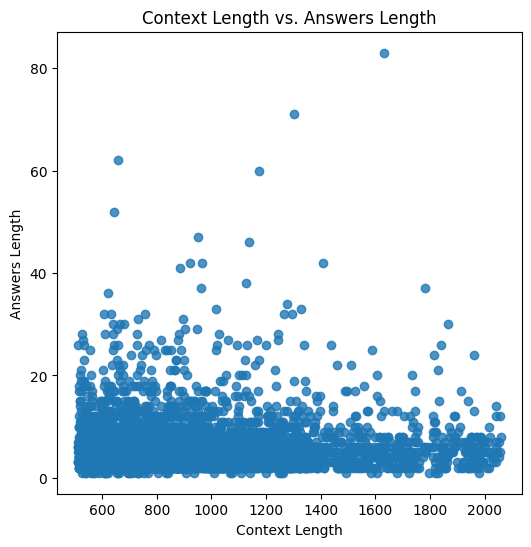

In [24]:
# 본문 길이와 답변 길이 간의 상관관계 분석

plt.figure(figsize=(6, 6))
plt.scatter(train_context_len_list, train_answers_len_list, alpha=0.8)
plt.title('Context Length vs. Answers Length')
plt.xlabel('Context Length')
plt.ylabel('Answers Length')
plt.show()

- 본문 길이 분포와 답변 길이 분포 간 추세가 존재하지 않음을 알 수 있음

#### 2-1-4. 중복값 조사

In [25]:
from collections import Counter

# 문서의 텍스트를 리스트로 가져오기
documents = train['train']['context']
answers = [answer['text'][0] for answer in train['train']['answers']]

# 문서의 빈도 계산
document_counts = Counter(documents)

# 중복 문서 확인
duplicates = [doc for doc, count in document_counts.items() if count > 1]

# 중복 문서에 해당하는 답변 추출
duplicate_answers = []
for doc in duplicates:
    indices = [i for i, d in enumerate(documents) if d == doc]
    duplicate_answers.extend([answers[i] for i in indices])

# 중복 답변의 빈도 계산
answer_counts = Counter(duplicate_answers)
duplicate_answer_count = sum(1 for count in answer_counts.values() if count > 1)

print(f"중복 문서 수: {len(duplicates)}")
print(f"중복 답변 수: {duplicate_answer_count}")

중복 문서 수: 579
중복 답변 수: 64


In [26]:
import hashlib
from collections import defaultdict

# 문서의 텍스트를 리스트로 가져오기
documents = train['train']['context']
questions = train['train']['question']
answers = [answer['text'][0] for answer in train['train']['answers']]

# 해시 값을 저장할 딕셔너리
hash_dict = defaultdict(list)

# 중복 문서 저장
duplicates = []

for idx, doc in enumerate(documents):
    # 문서의 해시 값 계산
    doc_hash = hashlib.md5(doc.encode('utf-8')).hexdigest()
    
    if doc_hash in hash_dict:
        duplicates.append((hash_dict[doc_hash][0], idx))
    else:
        hash_dict[doc_hash].append(idx)

# 중복 문서의 앞부분 100자 및 질문, 답변 출력
print(f"중복 문서 쌍 수: {len(duplicates)}\n")
for idx1, idx2 in duplicates:
    print(f"문서 1 (ID: {idx1}): {documents[idx1][:100]}")
    print(f"문서 2 (ID: {idx2}): {documents[idx2][:100]}\n")
    print(f"질문 1: {questions[idx1]}")
    print(f"질문 2: {questions[idx2]}\n")
    print(f"답변 1: {answers[idx1]}")
    print(f"답변 2: {answers[idx2]}")
    print("-" * 50)

중복 문서 쌍 수: 612

문서 1 (ID: 44): 1894년 장위영 영관을 지낸 무관이었다. 1896년 명성황후가 일본인 낭인들에게 살해되는 을미사변이 발생했을 때, 훈련대 제2대대 중대장이었던 이범래는 상관인 대대장 이두황과 함
문서 2 (ID: 68): 1894년 장위영 영관을 지낸 무관이었다. 1896년 명성황후가 일본인 낭인들에게 살해되는 을미사변이 발생했을 때, 훈련대 제2대대 중대장이었던 이범래는 상관인 대대장 이두황과 함

질문 1: 이범래는 일본에서 언제까지 도피 생활을 했나요?
질문 2: 을미사변 직후에 이범래는 무엇에 임명되었나요?

답변 1: 1907년까지
답변 2: 새로 조직된 훈련대의 제1대 대대장
--------------------------------------------------
문서 1 (ID: 196): 하느님이시요 사람이신 그리스도의 시\n1943년부터 1951년까지 마리아 발토르타는 122권의 수첩에 15,000페이지에 달하는 글을 수기로 써냈다. 여기에 추가적으로 일곱 권의 
문서 2 (ID: 292): 하느님이시요 사람이신 그리스도의 시\n1943년부터 1951년까지 마리아 발토르타는 122권의 수첩에 15,000페이지에 달하는 글을 수기로 써냈다. 여기에 추가적으로 일곱 권의 

질문 1: 《하느님이시요 사람이신 그리스도의 시》는 누구의 생애를 다루고 있나요?
질문 2: 마리아는 어느 나라에 계속 머물러 있었나요?

답변 1: 예수 그리스도
답변 2: 이탈리아
--------------------------------------------------
문서 1 (ID: 131): 1878년 10월 21일 조선 충청북도 증평에서 태어난 그는 형제로는 독립운동가 연병호가 있다. 유년기에 대해서는 거의 알려진 것이 없으나, 관립외국어학교 영어학교를 졸업했고 18
문서 2 (ID: 320): 1878년 10월 21일 조선 충청북도 증평에서 태어난 그는 형제로는 독립운동가 연병호가 있다. 유년기에 대해서는 거의 알려진 것

In [27]:
# 문서의 텍스트를 리스트로 가져오기
documents = train['train']['context']
questions = train['train']['question']
answers = [answer['text'][0] for answer in train['train']['answers']]

# 답변의 해시 값을 저장할 딕셔너리
answer_hash_dict = defaultdict(list)

# 중복 답변 저장
duplicate_answers = []

for idx, ans in enumerate(answers):
    # 답변의 해시 값 계산
    ans_hash = hashlib.md5(ans.encode('utf-8')).hexdigest()
    
    if ans_hash in answer_hash_dict:
        duplicate_answers.append((answer_hash_dict[ans_hash][0], idx))
    else:
        answer_hash_dict[ans_hash].append(idx)

# 중복 답변에 대한 문서, 질문, 답변 출력
print(f"중복 답변 쌍 수: {len(duplicate_answers)}\n")
for idx1, idx2 in duplicate_answers:
    print(f"문서 1 (ID: {idx1}): {documents[idx1][:100]}")
    print(f"문서 2 (ID: {idx2}): {documents[idx2][:100]}\n")
    print(f"질문 1: {questions[idx1]}")
    print(f"질문 2: {questions[idx2]}\n")
    print(f"답변 1: {answers[idx1]}")
    print(f"답변 2: {answers[idx2]}")
    print("-" * 50)

중복 답변 쌍 수: 330

문서 1 (ID: 3): 불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든 것을 불감(佛龕)이라고 한다. 불감은 그 안에 모신 불상의 양식뿐만 아니라, 당시의 건축 양식을
문서 2 (ID: 36): 파키스탄은 중국과 손잡고 차바하르항에서 동쪽으로 불과 약 70 km에 떨어진 과다르항을 개발하고 있다. 일대일로 사업을 추진하는 중국은 서아시아의 물류 요충지 과다르항을 개발하는 

질문 1: 11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?
질문 2: 차바하르항은 어떤 나라 덕분에 미국의 제재를 받지 않게 되었나?

답변 1: 중국
답변 2: 중국
--------------------------------------------------
문서 1 (ID: 238): 이 동맹은 앞선 100년간에 길고 잔인한 전쟁에도 불구하고 지역적 이탈리아 국가들이 아니라는 인식에서 발생한 로디 조약의 일관적인 발전이였다. 그러므로 동맹은 상호간의 불신과 통일
문서 2 (ID: 240): 영국 정부는 프랑스의 통제 하에 있는 루이스버그 요새로 인해 영국 해군이 피해없이 세인트로렌스 강을 통과해서 퀘벡을 공략하기란 어렵다는 것을 인식했다. 1757년 로던 경이 이끌었

질문 1: 이탈리아 동맹 결성에 가장 큰 영향을 준 나라는 어디인가?
질문 2: 1757년 루이스버그 원정을 저지한 나라는?

답변 1: 프랑스
답변 2: 프랑스
--------------------------------------------------
문서 1 (ID: 3): 불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든 것을 불감(佛龕)이라고 한다. 불감은 그 안에 모신 불상의 양식뿐만 아니라, 당시의 건축 양식을
문서 2 (ID: 248): 무태장어(無泰長魚)는 뱀장어과의 동물이다. 뱀장어와 비슷하나 훨씬 크고 온몸에 검은 점이 흩어져 있으며 지방이 풍부하다. 생태도 뱀장어와 비슷해서 하천에서

### 2-2 데이터 분포 분석
#### 2-2-1. 답변 분포 분석

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
answers_list = [answer['text'][0] for answer in train['train']['answers']]
print(answers_list[:20])

['하원', '《경영의 실제》', '백성', '중국', '4개', '드래곤', '형양태수 왕식', '이탈리아군', '큰아들 유', '왕대마을', '음독자살', '출장 잦은 건축가', '반신화적인 인물인 우파', '1951년', '예수', "'초일기'", '1916년', '레드삭스', '삼판동', '다산 정약용']


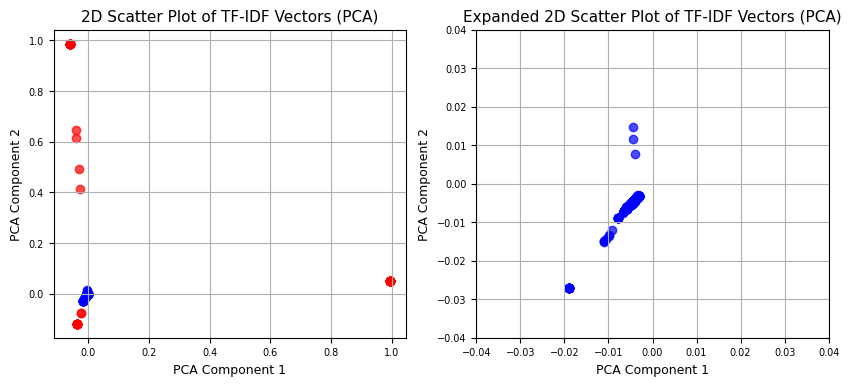

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

title_font_size = 11
label_font_size = 9
tick_font_size = 7
border = 0.04

# 100차원에서 2차원으로 축소
pca = PCA(n_components=2)

#tfidf = TfidfVectorizer(max_features=100) # 상위 100개의 단어만 사용
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(answers_list)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# limit 바깥의 점들 식별
out_of_bounds_indices = (tfidf_2d[:, 0] < -border) | (tfidf_2d[:, 0] > border) | (tfidf_2d[:, 1] < -border) | (tfidf_2d[:, 1] > border)

# limit 안의 점들
in_bounds_indices = ~out_of_bounds_indices


# 2D scatter plot으로 시각화
# axes[0].scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c='blue', marker='o', alpha=0.7)

# axes[0]에 점들 그리기
axes[0].scatter(tfidf_2d[in_bounds_indices, 0], tfidf_2d[in_bounds_indices, 1], c='blue', marker='o', alpha=0.7)
axes[0].scatter(tfidf_2d[out_of_bounds_indices, 0], tfidf_2d[out_of_bounds_indices, 1], c='red', marker='o', alpha=0.7)

axes[0].set_title('2D Scatter Plot of TF-IDF Vectors (PCA)', fontsize=title_font_size)
axes[0].set_xlabel('PCA Component 1', fontsize=label_font_size)
axes[0].set_ylabel('PCA Component 2', fontsize=label_font_size)
axes[0].grid(True)
axes[0].tick_params(labelsize=tick_font_size)

# axes[0] 확대
axes[1].scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c='blue', marker='o', alpha=0.7)
axes[1].set_title('Expanded 2D Scatter Plot of TF-IDF Vectors (PCA)', fontsize=title_font_size)
axes[1].set_xlabel('PCA Component 1', fontsize=label_font_size)
axes[1].set_ylabel('PCA Component 2', fontsize=label_font_size)
axes[1].grid(True)
axes[1].tick_params(labelsize=tick_font_size)
axes[1].set_xlim(-border, border)
axes[1].set_ylim(-border, border)


plt.show()


In [31]:
# limit 바깥의 점들 식별
out_of_bounds_indices = (tfidf_2d[:, 0] < -border) | (tfidf_2d[:, 0] > border) | (tfidf_2d[:, 1] < -border) | (tfidf_2d[:, 1] > border)
print(f'out_of_bounds_indices 길이 : {len(out_of_bounds_indices[out_of_bounds_indices == True])}')

# out_of_bounds_indices에 해당하는 id, question, answer, 좌표 추출
out_of_bounds_ids = [train['train']['id'][i] for i in range(len(train['train']['id'])) if out_of_bounds_indices[i]]
out_of_bounds_questions = [train['train']['question'][i] for i in range(len(train['train']['question'])) if out_of_bounds_indices[i]]
out_of_bounds_answers = [train['train']['answers'][i]['text'][0] for i in range(len(train['train']['answers'])) if out_of_bounds_indices[i]]
out_of_bounds_coordinates = [tfidf_2d[i] for i in range(len(tfidf_2d)) if out_of_bounds_indices[i]]

# 결과 출력
for id_, question, answer, coord in zip(out_of_bounds_ids, out_of_bounds_questions, out_of_bounds_answers, out_of_bounds_coordinates):
    # print(f"{coord}    ID: {id_}, Question: {question}, Answer: {answer}")
    print(f"{coord}    ID: {id_}, Answer: {answer}")

out_of_bounds_indices 길이 : 47
[-0.03848575 -0.11844046]    ID: mrc-0-000665, Answer: 일본
[-0.02550591 -0.07617801]    ID: mrc-0-002124, Answer: 일본 전국시대
[-0.0620027   0.98608726]    ID: mrc-0-004559, Answer: 영국
[0.99430431 0.05077666]    ID: mrc-1-001056, Answer: 프랑스
[0.99430431 0.05077666]    ID: mrc-0-004619, Answer: 프랑스
[0.99430431 0.05077666]    ID: mrc-1-000160, Answer: 프랑스
[-0.03848575 -0.11844046]    ID: mrc-1-001793, Answer: 일본
[-0.0620027   0.98608726]    ID: mrc-1-000570, Answer: 영국
[-0.03848575 -0.11844046]    ID: mrc-1-001618, Answer: 일본
[0.99430431 0.05077666]    ID: mrc-1-000001, Answer: 프랑스
[-0.03274625  0.49329545]    ID: mrc-1-000612, Answer: 영국 여왕 빅토리아
[0.99430431 0.05077666]    ID: mrc-0-004020, Answer: 프랑스
[-0.03848575 -0.11844046]    ID: mrc-0-000709, Answer: 일본
[-0.0620027   0.98608726]    ID: mrc-1-000125, Answer: 영국
[0.99430431 0.05077666]    ID: mrc-0-000565, Answer: 프랑스
[-0.0620027   0.98608726]    ID: mrc-0-003858, Answer: 영국
[-0.02784618  0.4119979 ]    ID: mr

In [32]:
import numpy as np

sample_size = 20

# limit 안의 점들 식별
in_bounds_indices = np.where(~out_of_bounds_indices)[0]

# 랜덤으로 30개의 인덱스 선택
random_indices = np.random.choice(in_bounds_indices, size=sample_size, replace=False)

# 선택된 인덱스에 해당하는 id, question, answer, 좌표 추출
random_ids = [train['train']['id'][i] for i in random_indices]
random_questions = [train['train']['question'][i] for i in random_indices]
random_answers = [train['train']['answers'][i]['text'][0] for i in random_indices]
random_coordinates = [tfidf_2d[i] for i in random_indices]

# 결과 출력
for id_, question, answer, coord in zip(random_ids, random_questions, random_answers, random_coordinates):
    print(f"{coord}    ID: {id_}, Answer: {answer}")

[-0.0031839  -0.00330614]    ID: mrc-0-003941, Answer: 조조
[-0.00334948 -0.00348901]    ID: mrc-0-002818, Answer: 여초(呂超)
[-0.00328093 -0.00341326]    ID: mrc-1-001752, Answer: 서사하라 국경
[-0.0031839  -0.00330614]    ID: mrc-0-005041, Answer: 시조 거인
[-0.00342944 -0.00357838]    ID: mrc-0-002858, Answer: 1965년
[-0.0031839  -0.00330614]    ID: mrc-0-000928, Answer: 멜랑콜리
[-0.0031839  -0.00330614]    ID: mrc-0-003589, Answer: 크리스토포 알하우스
[-0.0031839  -0.00330614]    ID: mrc-0-002309, Answer: 유독성 폐기물 매립장 건설 인가권
[-0.0031839  -0.00330614]    ID: mrc-0-001700, Answer: 청각 장애
[-0.0031839  -0.00330614]    ID: mrc-0-002331, Answer: 바순
[-0.0031839  -0.00330614]    ID: mrc-0-004143, Answer: 여진
[-0.0031839  -0.00330614]    ID: mrc-0-004174, Answer: Yoo Doo Right
[-0.0031839  -0.00330614]    ID: mrc-0-004806, Answer: 선조실록
[-0.0034293 -0.0035781]    ID: mrc-0-005017, Answer: 유금당
[-0.0031839  -0.00330614]    ID: mrc-0-003634, Answer: 방어용 잠정 조치
[-0.0031839  -0.00330614]    ID: mrc-0-004756, Answer: 주인공 노바
[-0.0

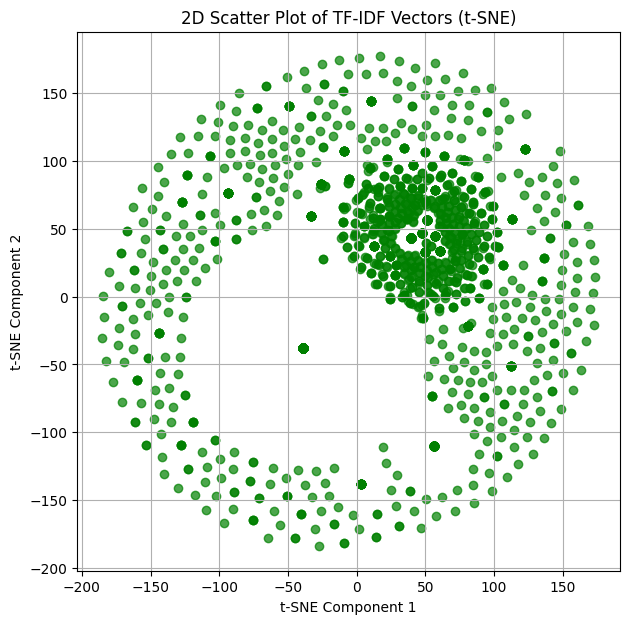

In [33]:
from sklearn.manifold import TSNE

# 100차원에서 2차원으로 축소 (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
tfidf_2d_tsne = tsne.fit_transform(tfidf_matrix.toarray())

# 2D scatter plot으로 시각화
plt.figure(figsize=(7, 7))
plt.scatter(tfidf_2d_tsne[:, 0], tfidf_2d_tsne[:, 1], c='green', marker='o', alpha=0.7)
plt.title('2D Scatter Plot of TF-IDF Vectors (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


<br>

**t-SNE 시각화 결과**
- 밀집된 데이터 클러스터가 존재하지만, 데이터의 분포가 비교적 균일하게 표현되어 있음
    - 밀집된 데이터 : 비슷한 텍스트나 주제, 질문-답변 세트에서 비슷한 패턴을 보이는 텍스트


In [34]:
one_point_list = []
for i in range(len(tfidf_2d_tsne)):
    if tfidf_2d_tsne[i][0] > -50 and tfidf_2d_tsne[i][0] < 0 and tfidf_2d_tsne[i][1] > -50 and tfidf_2d_tsne[i][1] < 0:
        one_point_list.append(i)
        
print(f'one_point_list 길이 : {len(one_point_list)}')

one_point_list 길이 : 2267


In [35]:
print(len(answers_list))

tfidf_matrix

3952


<3952x5279 sparse matrix of type '<class 'numpy.float64'>'
	with 6548 stored elements in Compressed Sparse Row format>

In [36]:
# 특정 범위 내의 점들 식별
range_indices = (tfidf_2d_tsne[:, 0] >= -50) & (tfidf_2d_tsne[:, 0] <= 0) & (tfidf_2d_tsne[:, 1] >= -50) & (tfidf_2d_tsne[:, 1] <= 0)
range_indices

array([False,  True,  True, ...,  True, False,  True])

In [37]:
# 범위 내의 점들에 해당하는 id, answer 추출
range_ids = [train['train']['id'][i] for i in range(len(train['train']['id'])) if range_indices[i]]
range_answers = [train['train']['answers'][i]['text'][0] for i in range(len(train['train']['answers'])) if range_indices[i]]
print(f'range_ids 길이 : {len(range_ids)}')
print(f'range_answers 길이 : {len(range_answers)}')

range_ids 길이 : 2267
range_answers 길이 : 2267


In [38]:
# 결과 출력
print(f"범위 내의 점들 갯수: {len(range_ids)}")
for id_, answer in zip(range_ids, range_answers):
    print(f"ID: {id_}, Answer: {answer}")

범위 내의 점들 갯수: 2267
ID: mrc-0-004397, Answer: 《경영의 실제》
ID: mrc-1-000362, Answer: 백성
ID: mrc-0-005265, Answer: 드래곤
ID: mrc-0-000532, Answer: 형양태수 왕식
ID: mrc-0-000977, Answer: 큰아들 유
ID: mrc-0-003839, Answer: 왕대마을
ID: mrc-1-000128, Answer: 음독자살
ID: mrc-0-000748, Answer: 출장 잦은 건축가
ID: mrc-0-000425, Answer: 반신화적인 인물인 우파
ID: mrc-1-000732, Answer: '초일기'
ID: mrc-0-000424, Answer: 레드삭스
ID: mrc-0-000250, Answer: 10달러
ID: mrc-0-000965, Answer: 체벽에 잇는 감지기
ID: mrc-0-001795, Answer: 아르투로
ID: mrc-0-005077, Answer: 우전왕(優塡王)식 착의법
ID: mrc-0-004459, Answer: 지상요원들
ID: mrc-0-005019, Answer: 빌 비크
ID: mrc-0-005037, Answer: 사대부
ID: mrc-1-001136, Answer: 깨진 술잔
ID: mrc-0-002827, Answer: 경례
ID: mrc-0-003404, Answer: 〈마브루공(公)〉
ID: mrc-0-001456, Answer: 핑둥현
ID: mrc-0-001337, Answer: 나고야
ID: mrc-0-001698, Answer: 새로 조직된 훈련대의 제1대 대대장
ID: mrc-0-003615, Answer: 평형상태
ID: mrc-0-002331, Answer: 바순
ID: mrc-0-002415, Answer: 2000년
ID: mrc-0-002142, Answer: 〈목포의 눈물〉
ID: mrc-1-001403, Answer: 의사
ID: mrc-0-000253, Answer: 마이스터고